In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.metrics import accuracy_score

In [73]:
df = pd.read_csv('ml_test.csv').set_index('id')
df['plan'].value_counts(dropna=False)

plan
Pro         496
Standard    196
Free        178
Premium      81
Name: count, dtype: int64

In [75]:
tst2 = []
for val in df['plan']:
    if val == 'Free':
        tst2.append(0.0)
    elif val == 'Standard':
        tst2.append(1.0)
    elif val == 'Pro':
        tst2.append(2.0)
    else:
        tst2.append(3.0)

df['plan'] = tst2

In [77]:
df['plan'].value_counts()

plan
2.0    496
1.0    196
0.0    178
3.0     81
Name: count, dtype: int64

In [78]:
X_cols = ['paid', 'isFiliated', 'cashback']
Y_cols = ['plan']

In [79]:
X = df[X_cols]

X['isFiliated'] = X['isFiliated'].astype(int)

Y = df[Y_cols]

/tmp/ipykernel_33697/1855106906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isFiliated'] = X['isFiliated'].astype(int)


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [98]:
modelTest = KNeighborsClassifier(n_neighbors=7)
modelTest.fit(X_train, Y_train)

/home/victorbitt/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

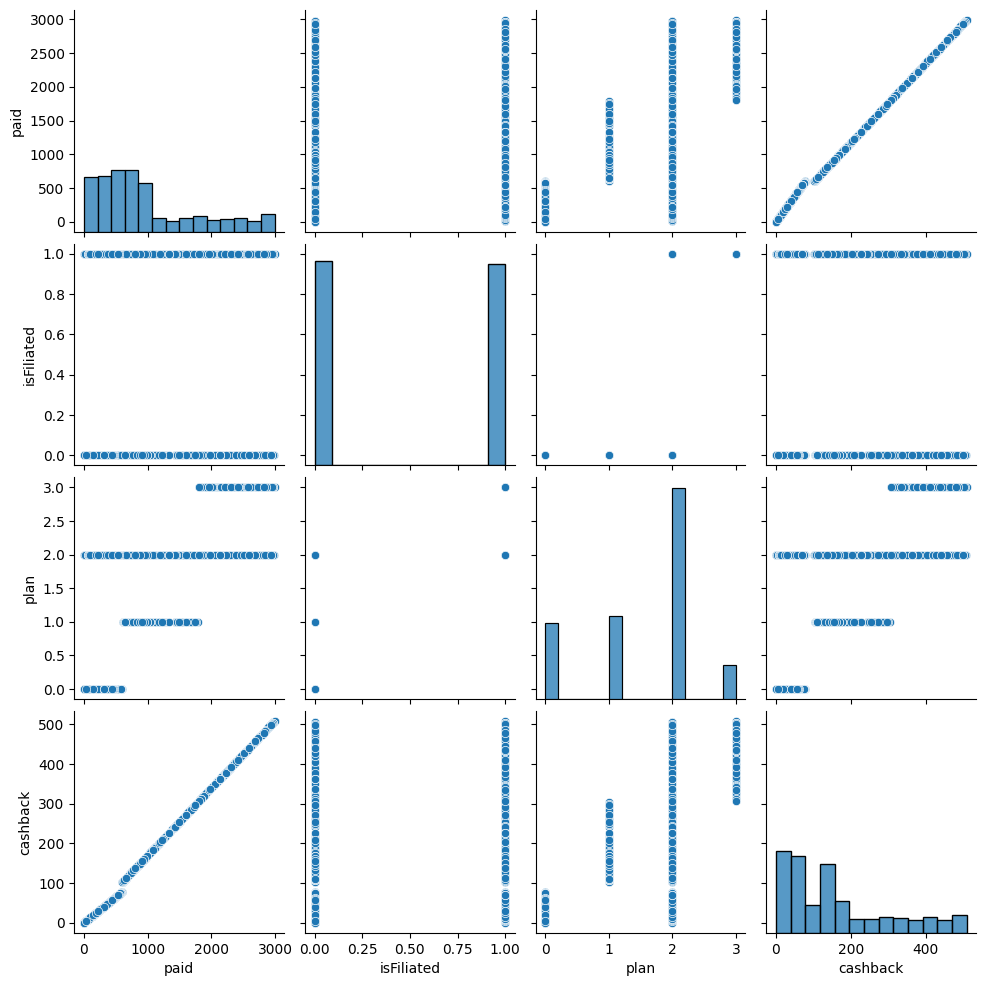

In [89]:
sb.pairplot(df)

In [99]:
preds = modelTest.predict(X_test)

In [104]:
currACC = accuracy_score(Y_test, preds)
print(f"The model current accuracy is {currACC:.4f} or {(currACC*100):.4f}%")

The model current accuracy is 0.5245 or 52.4476%
